<a href="https://colab.research.google.com/github/oektomo/KelasRLG2/blob/master/annTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
Fs = 201
x1 = np.outer(np.linspace(-10., 10., Fs), np.ones(Fs))
x2 = np.outer(np.linspace(-10., 10., Fs), np.ones(Fs))
x2 = x2.T

In [21]:
fx = 0.005* (x1**2 + 2*x2**2)-0.5
fxflaten = fx.flatten()
fxreshape = np.reshape(fxflaten, (Fs, Fs))

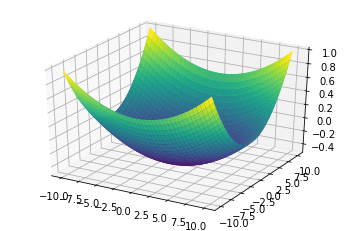

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')
ax.plot_surface(x1, x2, fxreshape,cmap='viridis', edgecolor='none')

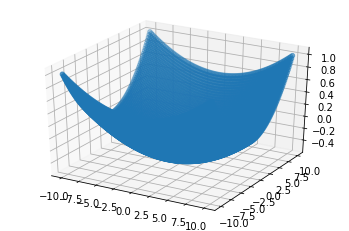

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, fx)

In [6]:
#!pip install tensorflow

In [7]:
import tensorflow.keras as keras
from tensorflow.keras.layers import *

In [23]:
#model = keras.Sequential([keras.layers.Dense(units=2, input_shape=[2])])
model = keras.Sequential()
model.add(Dense(2, input_dim=2, activation='linear'))
# model.add(Dense(5, activation='sigmoid'))
# model.add(Dense(50, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
#model.add(Dense(2))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 30)                90        
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
input1 = np.stack([x1.flatten(), x2.flatten()])
# type(input1)
X = input1.T
#X = input1
# X.shape
# input1[1][1]
y = fx.flatten()
#y.shape

In [29]:
model.fit(X, y, epochs=10, batch_size=Fs)

Epoch 1/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 2/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 3/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 4/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 5/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 6/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 7/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 8/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 9/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 10/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0027


In [30]:
y_predict = model.predict(X)
y2d_predict = np.reshape(y_predict, (Fs, Fs))
y2d_predict.shape

(201, 201)

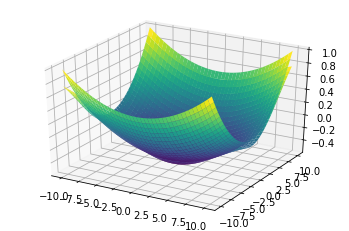

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, y2d_predict,cmap='viridis', edgecolor='none')
ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, fx)

In [12]:
x = np.outer(np.linspace(-2, 2, 5), np.ones(5))

In [72]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
# np.stack([a, a]).reshape(-1)
np.stack([a, a])
# np.hstack([a, a])

array([[1, 2, 3],
       [1, 2, 3]])

In [85]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
77/77 [==============================] - 2s 2ms/step - loss: 3.4166 - accuracy: 0.5651
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.7486 - accuracy: 0.5846
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.2705 - accuracy: 0.6068
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0852 - accuracy: 0.6029
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9524 - accuracy: 0.6341
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.6276
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8218 - accuracy: 0.6458
Epoch 8/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7411 - accuracy: 0.6589
Epoch 9/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.6615
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.6784
Epoch 11/

In [87]:
type(X)

numpy.ndarray

In [86]:
X.shape

(768, 8)